#DATA ANALYSIS 2
##Exploration on unique trends

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ace_tools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Data240/processed_final_data_adjustment.csv')
data.head()

,Title,Company_Name,Location,Via,Min_Salary,Max_Salary,Programming_Languages,Visualization_Tools,Databases_and_Big_Data_Tools,ML_and_Data_Science_Libraries,Cloud_Services,Education,Experience,Soft_Skills,Work_Mode,job_position,level,State,Min_Salary_Outlier,Max_Salary_Outlier
0,Data Scientist,Apple,"Austin, TX",Careers At Apple,146975.0,197450.0,"sql, python",tableau,mysql,"tensorflow, pytorch, scikit-learn","docker, kubernetes",bachelor,5,"communication skills, collaboration, leadership",hybrid,Data Scientist,Unspecified,TX,False,False
1,Data Scientist,Select Minds LLC,"Dallas, TX",LinkedIn,146975.0,197450.0,"r, sql, python",tableau,spark,"tensorflow, pytorch, scikit-learn",aws,bachelor,3,communication skills,hybrid,Data Scientist,Unspecified,TX,False,False
2,Principal Data Scientist,MD Anderson,"Houston, TX",MD Anderson - MD Anderson Cancer Center,132728.0,234000.0,python,tableau,spark,"tensorflow, pytorch, scikit-learn",aws,bachelor,5,"decision-making, collaboration, collaboration,...",remote,Data Scientist,Senior-level,TX,False,False
3,Data Scientist - Causal Discovery,CPChem,"The Woodlands, TX",Careers At Chevron Phillips - Chevron Phillips...,146975.0,197450.0,"go, r, sql, python",tableau,spark,"tensorflow, pytorch, scikit-learn","microsoft azure, aws",master,3,"communication skills, decision-making",hybrid,Data Scientist,Unspecified,TX,False,False
4,Senior Data Scientist-Remote,Baker Hughes,"Houston, TX (+1 other)",Baker Hughes,104000.0,150000.0,"scala, r, python",tableau,spark,"tensorflow, keras",aws,master,5,communication skills,remote,Data Scientist,Senior-level,TX,False,False


In [4]:
data['Average_Salary'] = (data['Min_Salary'] + data['Max_Salary'])/2

## Job Distribution by Location GeoSpatial Analysis

In [14]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Use the full dataset with all locations
city_coordinates = data[['Location']].copy()

# Initialize the geocoder
geolocator = Nominatim(user_agent="city_geocoder")

# Function to geocode a city
def geocode_city(location):
    try:
        geocode_result = geolocator.geocode(location)
        if geocode_result:
            return geocode_result.latitude, geocode_result.longitude
    except GeocoderTimedOut:
        time.sleep(1)
        return geocode_city(location)
    return None, None

# Add latitude and longitude columns
city_coordinates['latitude'] = None
city_coordinates['longitude'] = None

# Geocode each location
for idx, location in enumerate(city_coordinates['Location']):
    print(f"Geocoding {location} ({idx + 1}/{len(city_coordinates)})...")
    lat, lon = geocode_city(location)
    city_coordinates.loc[idx, 'latitude'] = lat
    city_coordinates.loc[idx, 'longitude'] = lon

# Save the updated data with geocoded coordinates
geocoded_file_path = "/content/geocoded_city_coordinates_full.csv"
city_coordinates.to_csv(geocoded_file_path, index=False)

geocoded_file_path


Geocoding Austin, TX (1/4120)...
Geocoding Dallas, TX (2/4120)...
Geocoding Houston, TX (3/4120)...
Geocoding The Woodlands, TX (4/4120)...
Geocoding Houston, TX (+1 other) (5/4120)...
Geocoding Houston, TX (6/4120)...
Geocoding Plano, TX (+6 others) (7/4120)...
Geocoding Houston, TX (8/4120)...
Geocoding Houston, TX (9/4120)...
Geocoding Austin, TX (10/4120)...
Geocoding New York, NY (11/4120)...
Geocoding New York, NY (12/4120)...
Geocoding New York, NY (13/4120)...
Geocoding New York, NY (14/4120)...
Geocoding New York, NY (15/4120)...
Geocoding New York, NY (16/4120)...
Geocoding New York, NY (17/4120)...
Geocoding New York, NY (18/4120)...
Geocoding New York, NY (19/4120)...
Geocoding New York, NY (20/4120)...
Geocoding Los Angeles, CA (21/4120)...
Geocoding Santa Monica, CA (22/4120)...
Geocoding Los Angeles, CA (23/4120)...
Geocoding Pomona, CA (24/4120)...
Geocoding Irvine, CA (25/4120)...
Geocoding Foothill Ranch, California (26/4120)...
Geocoding Huntington Beach, CA (27/4120

Geocoding Anywhere (140/4120)...
Geocoding Bakersfield, CA (141/4120)...
Geocoding Hayward, CA (142/4120)...
Geocoding San Francisco, CA (143/4120)...
Geocoding Gilbert, AZ (144/4120)...
Geocoding Mountain View, CA (145/4120)...
Geocoding Nashville, TN (146/4120)...
Geocoding Anywhere (147/4120)...
Geocoding North Carolina (148/4120)...
Geocoding Pittsburgh, PA (149/4120)...
Geocoding Cary, NC (150/4120)...
Geocoding Cincinnati, OH (151/4120)...
Geocoding Anywhere (152/4120)...
Geocoding Warrendale, PA (153/4120)...
Geocoding Malvern, PA (154/4120)...
Geocoding Houston, PA (155/4120)...
Geocoding Dublin, OH (156/4120)...
Geocoding Dayton, OH (157/4120)...
Geocoding Charleston, WV (158/4120)...
Geocoding Day Heights, OH (159/4120)...
Geocoding Columbus, OH (160/4120)...
Geocoding Coraopolis, PA (161/4120)...
Geocoding Westerville, OH (162/4120)...
Geocoding Pittsburgh, PA (163/4120)...
Geocoding Monroeville, PA (164/4120)...
Geocoding Texas (165/4120)...
Geocoding Baytown, TX (166/4120)

Geocoding Charlotte, NC (424/4120)...
Geocoding Washington, DC (425/4120)...
Geocoding Burlington, MA (426/4120)...
Geocoding Springfield, MA (427/4120)...
Geocoding Merrillville, IN (428/4120)...
Geocoding Laughlin AFB, TX (429/4120)...
Geocoding United States (430/4120)...
Geocoding Concord, NH (431/4120)...
Geocoding New York, NY (+6 others) (432/4120)...
Geocoding Helena, MT (433/4120)...
Geocoding New York (434/4120)...
Geocoding Anywhere (435/4120)...
Geocoding North Chicago, IL (436/4120)...
Geocoding Cupertino, CA (437/4120)...
Geocoding Anywhere (438/4120)...
Geocoding Chicago, IL (439/4120)...
Geocoding Fresno, CA (440/4120)...
Geocoding Charlotte, NC (441/4120)...
Geocoding Newark, NJ (442/4120)...
Geocoding United States (443/4120)...
Geocoding Irving, TX (444/4120)...
Geocoding Pontiac, MI (445/4120)...
Geocoding New York, NY (446/4120)...
Geocoding Silver Spring, MD (447/4120)...
Geocoding New York, NY (448/4120)...
Geocoding Palatine, IL (449/4120)...


Geocoding Anywhere (450/4120)...
Geocoding Westlake, TX (+2 others) (451/4120)...
Geocoding Nashville, TN (452/4120)...
Geocoding New York, NY (453/4120)...
Geocoding San Francisco, CA (454/4120)...
Geocoding San Francisco, CA (455/4120)...
Geocoding New York, NY (456/4120)...
Geocoding Lansing, MI (457/4120)...
Geocoding Fort Worth, TX (458/4120)...
Geocoding Jamesburg, NJ (459/4120)...
Geocoding Anywhere (460/4120)...
Geocoding Palatine, IL (461/4120)...
Geocoding Falls Church, Virginia (462/4120)...
Geocoding Brookhaven, GA (463/4120)...
Geocoding Lewisville, TX (464/4120)...
Geocoding San Francisco, CA (465/4120)...
Geocoding Anywhere (466/4120)...
Geocoding Mountain View, CA (467/4120)...
Geocoding San Francisco, CA (468/4120)...
Geocoding Anywhere (469/4120)...
Geocoding Bellevue, WA (470/4120)...
Geocoding San Diego, CA (471/4120)...
Geocoding Anywhere (472/4120)...
Geocoding New York, NY (473/4120)...
Geocoding Spokane, WA (474/4120)...
Geocoding Dearborn, MI (475/4120)...
Geoc

Geocoding Williamsburg, VA (504/4120)...
Geocoding Anywhere (505/4120)...
Geocoding Townsend, MA (506/4120)...
Geocoding Horsham, PA (507/4120)...
Geocoding Chicago, IL (508/4120)...
Geocoding New York, NY (509/4120)...
Geocoding Anywhere (510/4120)...
Geocoding Reston, VA (511/4120)...
Geocoding Oklahoma City, OK (512/4120)...
Geocoding Kansas City, MO (513/4120)...
Geocoding Oklahoma (514/4120)...
Geocoding Kansas City, MO (515/4120)...
Geocoding Bentonville, AR (516/4120)...
Geocoding Anywhere (517/4120)...
Geocoding Olathe, KS (518/4120)...
Geocoding Bentonville, AR (519/4120)...
Geocoding Olathe, KS (520/4120)...
Geocoding Manhattan, KS (521/4120)...
Geocoding Pennington, NJ (522/4120)...
Geocoding Anywhere (523/4120)...
Geocoding Philadelphia, PA (524/4120)...
Geocoding Burlington, NJ (525/4120)...
Geocoding Newark, DE (526/4120)...
Geocoding Philadelphia, PA (527/4120)...
Geocoding Philadelphia, PA (528/4120)...
Geocoding Wayne, PA (529/4120)...
Geocoding Delaware (530/4120)...


Geocoding Anywhere (623/4120)...
Geocoding Seattle, WA (624/4120)...
Geocoding Anywhere (625/4120)...
Geocoding Cupertino, CA (626/4120)...
Geocoding Bellevue, WA (627/4120)...
Geocoding Menlo Park, CA (628/4120)...
Geocoding United States (629/4120)...
Geocoding Lincolnshire, IL (630/4120)...
Geocoding Hartford, WI (631/4120)...
Geocoding Redwood City, CA (632/4120)...
Geocoding Moorestown, NJ (633/4120)...
Geocoding Salisbury, MD (634/4120)...
Geocoding Denver, CO (635/4120)...
Geocoding Portland, ME (636/4120)...
Geocoding Cupertino, CA (637/4120)...


Geocoding Dallas, TX (638/4120)...
Geocoding Trenton, NJ (+6 others) (639/4120)...
Geocoding New York, NY (640/4120)...
Geocoding Cupertino, CA (641/4120)...
Geocoding Santa Clara, CA (642/4120)...
Geocoding Charlotte, NC (643/4120)...
Geocoding Santa Monica, CA (644/4120)...
Geocoding Dearborn, MI (645/4120)...
Geocoding Dallas, TX (646/4120)...
Geocoding Brooklyn, NY (647/4120)...
Geocoding Oakbrook Terrace, IL (648/4120)...


Geocoding Cupertino, CA (649/4120)...
Geocoding Seattle, WA (+2 others) (650/4120)...
Geocoding Bentonville, AR (651/4120)...
Geocoding Sunnyvale, CA (652/4120)...
Geocoding San Jose, CA (653/4120)...
Geocoding Washington, DC (654/4120)...
Geocoding Seattle, WA (+1 other) (655/4120)...
Geocoding Providence, RI (656/4120)...
Geocoding Palo Alto, CA (657/4120)...
Geocoding Eden Prairie, MN (658/4120)...
Geocoding Las Vegas, NV (659/4120)...
Geocoding San Jose, NM (660/4120)...
Geocoding Tucker, GA (661/4120)...


Geocoding Laguna Hills, CA (662/4120)...
Geocoding Anywhere (663/4120)...
Geocoding Los Angeles, CA (664/4120)...
Geocoding San Francisco, CA (665/4120)...
Geocoding Silver Spring, MD (666/4120)...
Geocoding Minneapolis, MN (667/4120)...
Geocoding Jersey City, NJ (668/4120)...
Geocoding St. Louis, MO (669/4120)...
Geocoding Scottsdale, AZ (670/4120)...
Geocoding Reston, VA (671/4120)...
Geocoding Anywhere (672/4120)...
Geocoding Juneau, AK (673/4120)...
Geocoding Austin, TX (674/4120)...
Geocoding New York, NY (675/4120)...
Geocoding Redmond, WA (676/4120)...
Geocoding Sunnyvale, CA (677/4120)...
Geocoding United States (678/4120)...
Geocoding California (679/4120)...
Geocoding Plano, TX (680/4120)...
Geocoding Paradise Valley, AZ (681/4120)...
Geocoding Los Angeles, CA (682/4120)...
Geocoding Pittsburgh, PA (683/4120)...
Geocoding Tampa, FL (684/4120)...
Geocoding Seattle, WA (685/4120)...
Geocoding Honolulu, HI (686/4120)...
Geocoding Atlanta, GA (687/4120)...
Geocoding San Francisco

Geocoding Madison, WI (724/4120)...
Geocoding Hanover, NH (725/4120)...
Geocoding New York, NY (726/4120)...
Geocoding Sunnyvale, CA (727/4120)...
Geocoding Cupertino, CA (728/4120)...
Geocoding Plano, TX (729/4120)...
Geocoding Chicago, IL (730/4120)...
Geocoding Anywhere (731/4120)...
Geocoding Redmond, WA (732/4120)...
Geocoding Anywhere (733/4120)...
Geocoding San Francisco, CA (734/4120)...
Geocoding New York, NY (735/4120)...
Geocoding San Jose, CA (736/4120)...
Geocoding San Francisco, CA (737/4120)...
Geocoding Anywhere (738/4120)...
Geocoding San Francisco, CA (739/4120)...
Geocoding Redwood City, CA (740/4120)...
Geocoding Los Angeles, CA (741/4120)...
Geocoding Austin, TX (742/4120)...
Geocoding Anywhere (743/4120)...
Geocoding San Francisco, CA (744/4120)...
Geocoding San Jose, CA (745/4120)...
Geocoding Chicago, IL (746/4120)...
Geocoding Anywhere (747/4120)...
Geocoding San Francisco, CA (748/4120)...
Geocoding Palo Alto, CA (749/4120)...
Geocoding San Jose, CA (750/4120)

Geocoding Houston, TX (1388/4120)...
Geocoding Somerville, MA (1389/4120)...
Geocoding New Orleans, LA (1390/4120)...
Geocoding Anywhere (1391/4120)...
Geocoding Greer, SC (1392/4120)...
Geocoding Cupertino, CA (1393/4120)...
Geocoding Manchester, MO (1394/4120)...
Geocoding Irving, TX (1395/4120)...
Geocoding Menlo Park, CA (1396/4120)...
Geocoding Grand Forks, ND (1397/4120)...
Geocoding Tempe, AZ (1398/4120)...
Geocoding Reston, VA (1399/4120)...
Geocoding Dallas, TX (1400/4120)...
Geocoding Montpelier, VT (1401/4120)...
Geocoding Los Angeles, CA (1402/4120)...
Geocoding Indianapolis, IN (1403/4120)...
Geocoding Boston, MA (1404/4120)...
Geocoding Nashville, TN (1405/4120)...
Geocoding Seattle, WA (1406/4120)...
Geocoding Severn, MD (1407/4120)...
Geocoding Memphis, TN (1408/4120)...
Geocoding Milwaukee, WI (1409/4120)...
Geocoding Spokane, WA (1410/4120)...
Geocoding Monterey, CA (1411/4120)...
Geocoding Londonderry, NH (1412/4120)...
Geocoding Menlo Park, CA (1413/4120)...
Geocodi

Geocoding Little Rock, AR (1423/4120)...
Geocoding Irvine, CA (1424/4120)...
Geocoding New York, NY (1425/4120)...
Geocoding Holmdel, NJ (1426/4120)...
Geocoding Grand Rapids, MI (1427/4120)...
Geocoding St Charles, MO (1428/4120)...
Geocoding Claremont, CA (1429/4120)...
Geocoding Moline, IL (1430/4120)...
Geocoding Creve Coeur, MO (1431/4120)...
Geocoding Seattle, WA (1432/4120)...
Geocoding Phoenix, AZ (1433/4120)...
Geocoding San Francisco, CA (1434/4120)...
Geocoding Grand Prairie, TX (1435/4120)...
Geocoding Sacramento, CA (1436/4120)...
Geocoding Bloomington, IL (1437/4120)...
Geocoding Fresno, CA (1438/4120)...
Geocoding Turner, OR (1439/4120)...
Geocoding Arden-On-The-Severn, MD (1440/4120)...
Geocoding Guadalupe, AZ (1441/4120)...
Geocoding Little Creek, DE (1442/4120)...
Geocoding Chicago, IL (1443/4120)...
Geocoding Charlotte, NC (1444/4120)...
Geocoding Wyoming, DE (1445/4120)...
Geocoding Burlingame, CA (1446/4120)...
Geocoding Hometown, IL (1447/4120)...
Geocoding Pennsy

Geocoding Winchester, VA (1697/4120)...
Geocoding Chantilly, VA (1698/4120)...
Geocoding West Greenwich, RI (1699/4120)...
Geocoding Bernards, NJ (1700/4120)...
Geocoding Manorhaven, NY (1701/4120)...
Geocoding Jersey City, NJ (1702/4120)...
Geocoding Bellingham, MA (1703/4120)...
Geocoding Arlington, VA (+1 other) (1704/4120)...
Geocoding Penbrook, PA (1705/4120)...
Geocoding Reston, VA (1706/4120)...


Geocoding Bethlehem, PA (1707/4120)...
Geocoding Richmond, VA (1708/4120)...
Geocoding New York, NY (1709/4120)...
Geocoding Los Angeles, CA (1710/4120)...
Geocoding Madera, CA (1711/4120)...
Geocoding Huntington Beach, CA (1712/4120)...
Geocoding Costa Mesa, CA (1713/4120)...
Geocoding Long Beach, CA (1714/4120)...
Geocoding Seaside, CA (1715/4120)...
Geocoding Las Vegas, NV (1716/4120)...
Geocoding San Diego, CA (1717/4120)...
Geocoding Irvine, CA (1718/4120)...
Geocoding Orange, CA (1719/4120)...
Geocoding Yorktown Heights, NY (1720/4120)...
Geocoding New York, NY (1721/4120)...
Geocoding Cambridge, MA (1722/4120)...
Geocoding New York, NY (1723/4120)...
Geocoding Hillsboro, OR (+1 other) (1724/4120)...
Geocoding Florham Park, NJ (1725/4120)...
Geocoding Ossining, NY (1726/4120)...
Geocoding Yorktown Heights, NY (1727/4120)...
Geocoding New York, NY (1728/4120)...
Geocoding Garrison, Maryland (1729/4120)...
Geocoding Santa Clara, CA (1730/4120)...
Geocoding Cambridge, MA (1731/4120)

Geocoding Arcadia, CA (2064/4120)...
Geocoding Santa Clarita, CA (2065/4120)...
Geocoding Los Angeles, CA (2066/4120)...
Geocoding Anywhere (2067/4120)...
Geocoding United States (2068/4120)...
Geocoding Colorado Springs, CO (+5 others) (2069/4120)...
Geocoding Anywhere (2070/4120)...
Geocoding Colorado Springs, CO (2071/4120)...
Geocoding Lakewood, CO (2072/4120)...
Geocoding United States (2073/4120)...
Geocoding Laporte, CO (2074/4120)...
Geocoding Los Alamos, NM (2075/4120)...
Geocoding Denver, CO (2076/4120)...
Geocoding Anywhere (2077/4120)...
Geocoding United States (2078/4120)...
Geocoding United States (2079/4120)...
Geocoding Aurora, CO (2080/4120)...
Geocoding Boulder, CO (2081/4120)...
Geocoding United States (2082/4120)...
Geocoding Denver, CO (+1 other) (2083/4120)...
Geocoding Fort Collins, CO (2084/4120)...
Geocoding Anywhere (2085/4120)...
Geocoding Anywhere (2086/4120)...
Geocoding McLean, VA (+2 others) (2087/4120)...
Geocoding Reston, VA (2088/4120)...
Geocoding Wor

Geocoding St. Louis, MO (2404/4120)...
Geocoding Los Angeles, CA (2405/4120)...
Geocoding Fresno, CA (2406/4120)...
Geocoding California (2407/4120)...
Geocoding California (2408/4120)...
Geocoding El Segundo, CA (2409/4120)...
Geocoding Chatsworth, CA (2410/4120)...
Geocoding San Diego, CA (2411/4120)...
Geocoding El Segundo, CA (2412/4120)...
Geocoding Irvine, CA (2413/4120)...
Geocoding El Segundo, CA (2414/4120)...
Geocoding Anywhere (2415/4120)...
Geocoding United States (2416/4120)...
Geocoding United States (2417/4120)...
Geocoding Denver, CO (2418/4120)...
Geocoding Aurora, CO (2419/4120)...
Geocoding Anywhere (2420/4120)...
Geocoding Denver, CO (2421/4120)...
Geocoding Cheyenne, WY (2422/4120)...
Geocoding United States (2423/4120)...
Geocoding Ashland, OH (2424/4120)...
Geocoding Columbus, OH (2425/4120)...
Geocoding Cincinnati, OH (2426/4120)...
Geocoding Cleveland, OH (2427/4120)...
Geocoding Hudson, OH (2428/4120)...
Geocoding Wright-Patterson AFB, OH (2429/4120)...
Geocod

Geocoding Indianapolis, IN (2519/4120)...
Geocoding Chicago, IL (2520/4120)...
Geocoding Pittsburgh, PA (2521/4120)...
Geocoding Chicago, IL (2522/4120)...
Geocoding Pittsburgh, PA (2523/4120)...
Geocoding North Chicago, IL (2524/4120)...
Geocoding Cincinnati, OH (2525/4120)...
Geocoding Anywhere (2526/4120)...
Geocoding Colorado Springs, CO (2527/4120)...
Geocoding Anywhere (2528/4120)...
Geocoding United States (2529/4120)...
Geocoding Cheyenne, WY (2530/4120)...
Geocoding Anywhere (2531/4120)...
Geocoding Pojoaque, NM (2532/4120)...
Geocoding Boulder, CO (2533/4120)...
Geocoding Boulder, CO (2534/4120)...
Geocoding United States (2535/4120)...
Geocoding Waverly, VA (2536/4120)...
Geocoding Atlanta, GA (2537/4120)...
Geocoding Roanoke, VA (2538/4120)...
Geocoding Lexington, SC (2539/4120)...
Geocoding Charlottesville, VA (2540/4120)...
Geocoding Virginia (2541/4120)...
Geocoding Raleigh, NC (2542/4120)...
Geocoding Raleigh, NC (2543/4120)...
Geocoding Richmond, VA (2544/4120)...
Geoc

Geocoding Stanford, CA (3012/4120)...
Geocoding San Francisco, CA (3013/4120)...
Geocoding Campbell, CA (3014/4120)...
Geocoding San Bruno, CA (3015/4120)...
Geocoding Menlo Park, CA (3016/4120)...
Geocoding Newark, CA (3017/4120)...
Geocoding Scottsdale, AZ (3018/4120)...
Geocoding United States (3019/4120)...
Geocoding United States (3020/4120)...
Geocoding Anywhere (3021/4120)...
Geocoding Littleton, CO (3022/4120)...
Geocoding Denver, CO (3023/4120)...
Geocoding Greenwood Village, CO (3024/4120)...
Geocoding Boulder, CO (3025/4120)...
Geocoding Anywhere (3026/4120)...
Geocoding United States (3027/4120)...
Geocoding Washington, DC (3028/4120)...
Geocoding North Wales, PA (3029/4120)...
Geocoding King of Prussia, PA (3030/4120)...
Geocoding New York, NY (3031/4120)...
Geocoding York, PA (3032/4120)...
Geocoding New York, NY (3033/4120)...
Geocoding New York, NY (3034/4120)...
Geocoding Bowers, PA (3035/4120)...
Geocoding Hamilton Township, NJ (3036/4120)...
Geocoding Schiller Park, 

Geocoding Anywhere (3305/4120)...
Geocoding Boulder, CO (3306/4120)...
Geocoding Broomfield, CO (3307/4120)...
Geocoding Lone Tree, CO (3308/4120)...
Geocoding Cheyenne, WY (3309/4120)...
Geocoding Allentown, PA (3310/4120)...
Geocoding Albany, NY (3311/4120)...
Geocoding Bridgewater, NJ (3312/4120)...
Geocoding Jersey City, NJ (3313/4120)...
Geocoding Stamford, CT (3314/4120)...
Geocoding Ewing Township, NJ (3315/4120)...
Geocoding Albany, NY (3316/4120)...
Geocoding Whitehouse Station, NJ (3317/4120)...
Geocoding Providence, RI (3318/4120)...
Geocoding Jersey City, NJ (3319/4120)...
Geocoding Harrisburg, PA (3320/4120)...
Geocoding Piscataway, NJ (3321/4120)...
Geocoding Lebanon, NH (3322/4120)...
Geocoding New York, NY (3323/4120)...
Geocoding New York, NY (3324/4120)...
Geocoding Glen Mills, PA (3325/4120)...
Geocoding Burlington, NJ (3326/4120)...
Geocoding Hoboken, NJ (3327/4120)...
Geocoding Budd Lake, NJ (3328/4120)...
Geocoding Wallingford, CT (3329/4120)...
Geocoding United S

Geocoding Mt Laurel Township, NJ (3344/4120)...
Geocoding Elkins Park, PA (3345/4120)...
Geocoding New Jersey (3346/4120)...
Geocoding Longport, NJ (3347/4120)...
Geocoding Princeton, NJ (3348/4120)...
Geocoding New York, NY (3349/4120)...
Geocoding New York, NY (3350/4120)...
Geocoding New York, NY (3351/4120)...
Geocoding New York, NY (3352/4120)...
Geocoding New York, NY (3353/4120)...
Geocoding New York, NY (3354/4120)...
Geocoding nan (3355/4120)...
Geocoding New York, NY (3356/4120)...
Geocoding Bronx, NY (3357/4120)...
Geocoding Franklin, TN (3358/4120)...
Geocoding Nashville, TN (3359/4120)...


Geocoding University, MS (3360/4120)...
Geocoding Nashville, TN (+3 others) (3361/4120)...
Geocoding Nashville, TN (3362/4120)...
Geocoding Brentwood, TN (3363/4120)...
Geocoding Water Valley, MS (3364/4120)...
Geocoding Nashville, TN (3365/4120)...
Geocoding Nashville, TN (3366/4120)...
Geocoding Nashville, TN (3367/4120)...
Geocoding Orange, CT (3368/4120)...
Geocoding Anywhere (3369/4120)...
Geocoding New City, NY (3370/4120)...
Geocoding Newark, NJ (3371/4120)...
Geocoding Hoboken, NJ (3372/4120)...
Geocoding New York, NY (3373/4120)...
Geocoding Norwalk, CT (3374/4120)...
Geocoding Parsippany-Troy Hills, NJ (3375/4120)...
Geocoding Worcester, MA (3376/4120)...
Geocoding Albany, NY (3377/4120)...
Geocoding New York, NY (3378/4120)...
Geocoding McLean, VA (3379/4120)...
Geocoding Kingston, NY (3380/4120)...
Geocoding Malvern, PA (3381/4120)...
Geocoding Hamden, CT (3382/4120)...
Geocoding New York, NY (3383/4120)...
Geocoding King of Prussia, PA (+1 other) (3384/4120)...
Geocoding C

Geocoding Las Vegas, NV (3430/4120)...


Geocoding Las Vegas, NV (3431/4120)...
Geocoding Rancho Cucamonga, CA (3432/4120)...
Geocoding Oxnard, CA (3433/4120)...
Geocoding Port Hueneme, CA (3434/4120)...
Geocoding San Luis Obispo, CA (3435/4120)...
Geocoding Paramount, CA (3436/4120)...
Geocoding Fountain Valley, CA (3437/4120)...
Geocoding Edgewater Park, NJ (3438/4120)...
Geocoding Washington, DC (3439/4120)...
Geocoding Silver Spring, MD (3440/4120)...
Geocoding Beaufort, NC (3441/4120)...
Geocoding Washington, DC (3442/4120)...
Geocoding McLean, VA (3443/4120)...
Geocoding Washington, DC (3444/4120)...
Geocoding Charlotte, NC (3445/4120)...
Geocoding Burnsville, NC (3446/4120)...
Geocoding Towson, MD (3447/4120)...
Geocoding Portland, OR (3448/4120)...
Geocoding Seattle, WA (3449/4120)...
Geocoding Kelso, WA (3450/4120)...
Geocoding Donald, OR (3451/4120)...
Geocoding Portland, OR (3452/4120)...
Geocoding Beaverton, OR (3453/4120)...
Geocoding Lynnwood, WA (3454/4120)...
Geocoding Brush Prairie, WA (3455/4120)...
Geocodin

Geocoding Orlando, FL (3628/4120)...
Geocoding Somerville, MA (3629/4120)...
Geocoding Woonsocket, RI (3630/4120)...
Geocoding Seattle, WA (3631/4120)...
Geocoding San Francisco, CA (3632/4120)...
Geocoding McLean, VA (3633/4120)...
Geocoding Colorado Springs, CO (3634/4120)...
Geocoding Anywhere (3635/4120)...
Geocoding Frisco, TX (3636/4120)...
Geocoding Boston, MA (3637/4120)...
Geocoding Denver, CO (3638/4120)...
Geocoding Lincolnwood, IL (3639/4120)...
Geocoding Bismarck, ND (3640/4120)...
Geocoding Mountain View, CA (3641/4120)...
Geocoding Sunnyvale, CA (3642/4120)...
Geocoding Manchester, MO (3643/4120)...
Geocoding Dallas, TX (3644/4120)...
Geocoding Tysons, VA (3645/4120)...
Geocoding Augusta, ME (3646/4120)...
Geocoding Salt Lake City, UT (3647/4120)...
Geocoding United States (3648/4120)...
Geocoding United States (3649/4120)...
Geocoding Houston, TX (+6 others) (3650/4120)...
Geocoding Norwood Young America, MN (3651/4120)...
Geocoding Burleson, TX (3652/4120)...
Geocoding

Geocoding Addison, TX (3794/4120)...
Geocoding Dallas, TX (3795/4120)...
Geocoding St. Louis, MO (3796/4120)...
Geocoding York, PA (3797/4120)...
Geocoding San Francisco, CA (3798/4120)...
Geocoding Ball Ground, GA (3799/4120)...
Geocoding Colorado Springs, CO (3800/4120)...
Geocoding Tysons, VA (3801/4120)...
Geocoding Anywhere (3802/4120)...
Geocoding Charlotte, NC (3803/4120)...
Geocoding Green Bay, WI (3804/4120)...
Geocoding Leawood, KS (3805/4120)...
Geocoding Amarillo, TX (3806/4120)...
Geocoding Clarkston, GA (3807/4120)...
Geocoding Burlington, MA (3808/4120)...
Geocoding Dallas, TX (3809/4120)...
Geocoding Norfolk, VA (3810/4120)...
Geocoding Las Vegas, NV (3811/4120)...
Geocoding St. Louis, MO (3812/4120)...
Geocoding Five Points, NC (3813/4120)...
Geocoding Miramar, FL (3814/4120)...
Geocoding Memphis, TN (3815/4120)...
Geocoding Cumming, GA (3816/4120)...
Geocoding Birmingham, AL (3817/4120)...
Geocoding Irvine, CA (3818/4120)...
Geocoding Winder, GA (3819/4120)...
Geocodi

Geocoding Anywhere (3927/4120)...
Geocoding Anywhere (3928/4120)...
Geocoding Boulder, CO (3929/4120)...
Geocoding Anywhere (3930/4120)...
Geocoding Denver, CO (3931/4120)...
Geocoding Littleton, CO (3932/4120)...
Geocoding Danvers, MA (3933/4120)...
Geocoding East Hartford, CT (3934/4120)...
Geocoding Grand View-On-Hudson, NY (3935/4120)...
Geocoding Atlantic City, NJ (3936/4120)...
Geocoding Ewing Township, NJ (3937/4120)...
Geocoding Boston, MA (3938/4120)...
Geocoding Chesterbrook, PA (3939/4120)...
Geocoding New Jersey (3940/4120)...
Geocoding New York, NY (3941/4120)...
Geocoding North Springfield, VA (3942/4120)...
Geocoding Leesburg, VA (3943/4120)...
Geocoding Washington, DC (3944/4120)...
Geocoding Anywhere (3945/4120)...
Geocoding Annapolis, MD (3946/4120)...
Geocoding Worcester, MA (3947/4120)...
Geocoding Boston, MA (3948/4120)...
Geocoding McLean, VA (+2 others) (3949/4120)...
Geocoding New York, NY (3950/4120)...
Geocoding Providence, RI (3951/4120)...
Geocoding Anywhere

'/content/geocoded_city_coordinates_full.csv'

In [28]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the geocoded data
full_geocoded_file_path = '/content/geocoded_city_coordinates_full.csv'
full_geocoded_data = pd.read_csv(full_geocoded_file_path)

# Filter out rows with missing latitude or longitude
filtered_geocoded_data = full_geocoded_data.dropna(subset=['latitude', 'longitude']).copy()

# Ensure all values in the Location column are strings
filtered_geocoded_data['Location'] = filtered_geocoded_data['Location'].fillna('Unknown').astype(str)

# Extract state names from the Location column
filtered_geocoded_data['state'] = filtered_geocoded_data['Location'].apply(
    lambda x: x.split(', ')[-1] if ', ' in x else 'Unknown'
)

# Add a default job count column
filtered_geocoded_data['job_count'] = 1  # Default: 1 job per location

# Aggregate job counts by state
state_job_counts = (
    filtered_geocoded_data.groupby('state')
    .agg(job_count=('job_count', 'sum'), latitude=('latitude', 'median'), longitude=('longitude', 'median'))
    .reset_index()
)


# Create the heatmap
job_map = folium.Map(location=[37.5, -95], zoom_start=4)  # Centered on the USA
HeatMap(
    data=filtered_geocoded_data[['latitude', 'longitude', 'job_count']].values.tolist(),
    radius=15,
    blur=7,
    max_zoom=13,
    gradient={0.2: 'blue', 0.5: 'lime', 0.8: 'orange', 1.0: 'red'}
).add_to(job_map)

# Add job counts on top of each state
for _, row in state_job_counts.iterrows():
    folium.map.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.DivIcon(
            html=f"""
                <div style="font-size: 14px; font-weight: bold; color: black; text-align: center;">
                    {int(row['job_count'])}
                </div>
            """
        )
    ).add_to(job_map)

# Save the map with state-level job counts
state_counts_map_file = "/content/2state_job_counts_heatmap.html"
job_map.save(state_counts_map_file)

state_counts_map_file


'/content/2state_job_counts_heatmap.html'

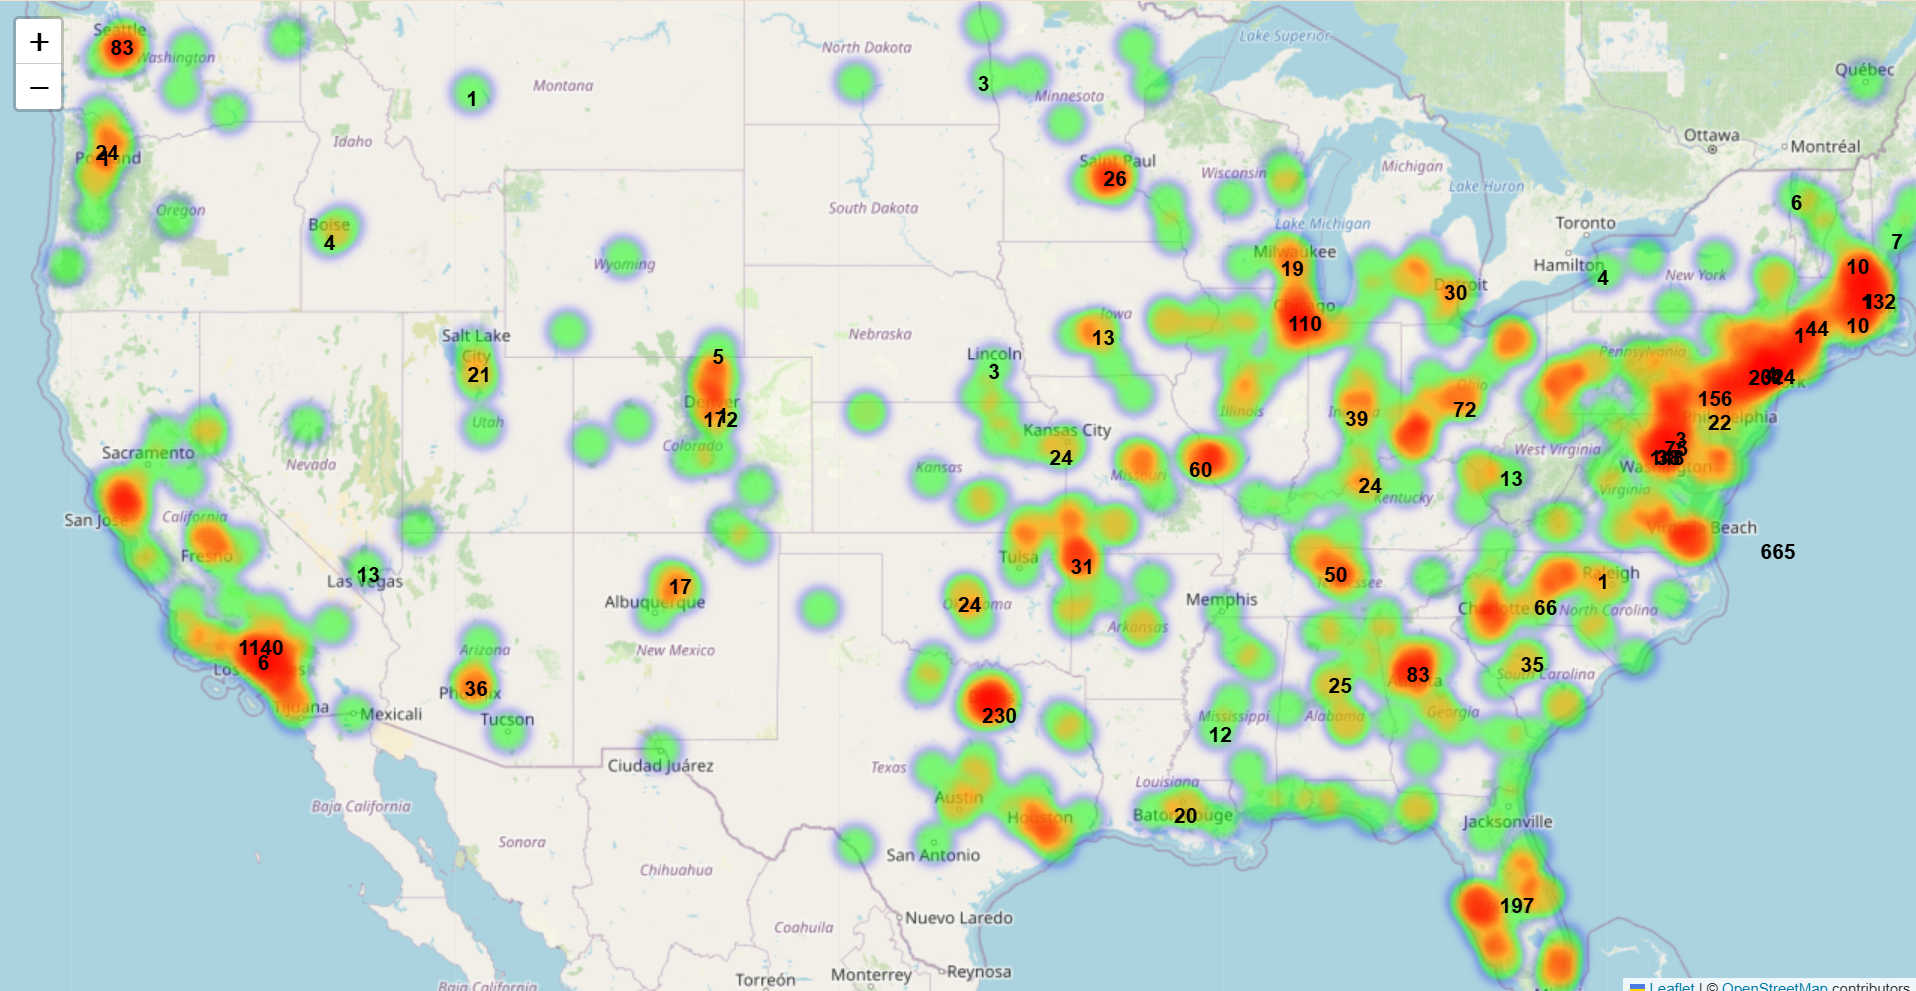

## Top 10 In Demand Job Positions and Skills

<ipython-input-52-5b0d15b0607d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_job_demand, x='Count', y='Job Position', ax=axes[0], palette='viridis')
<ipython-input-52-5b0d15b0607d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skills_frequency, x='Frequency', y='Skill', ax=axes[1], palette='coolwarm')


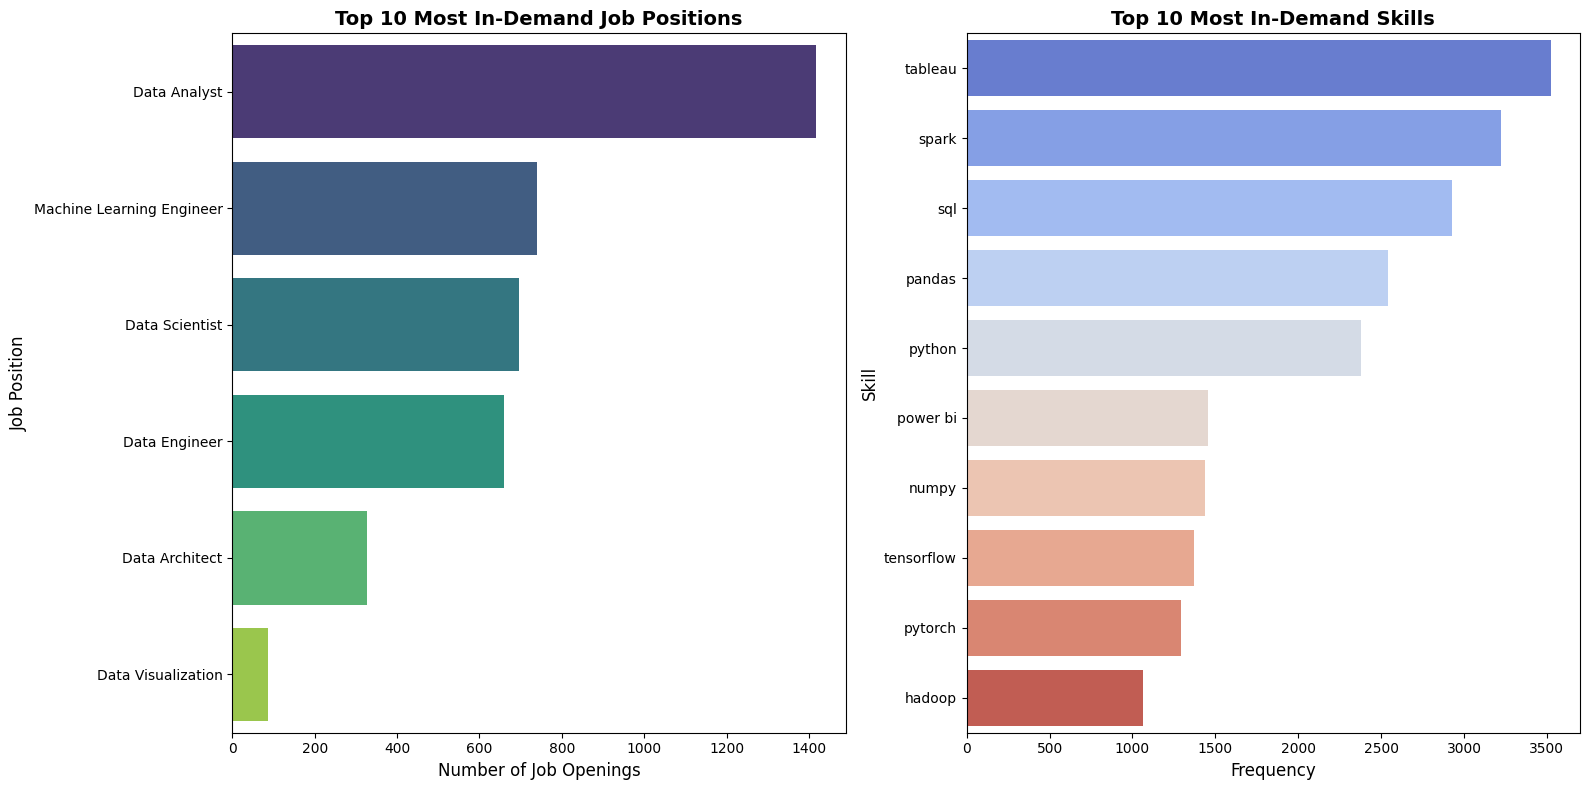

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out "Other" from the job positions
filtered_data = data[data['job_position'] != 'Other']

# Prepare data for job positions
job_demand = filtered_data['job_position'].value_counts().reset_index()
job_demand.columns = ['Job Position', 'Count']

# Combine skills columns into a single column and count frequencies
skills_columns = ['Programming_Languages', 'Visualization_Tools', 'Databases_and_Big_Data_Tools', 'ML_and_Data_Science_Libraries']
skills_data = filtered_data[skills_columns].fillna('').apply(lambda row: ','.join(row), axis=1)
skills_data = skills_data.str.split(',').explode().str.strip()
skills_data = skills_data[skills_data != '']  # Remove empty strings
skills_frequency = skills_data.value_counts().reset_index()
skills_frequency.columns = ['Skill', 'Frequency']

# Limit to top 10 for both job positions and skills
top_job_demand = job_demand.head(10)
top_skills_frequency = skills_frequency.head(10)

# Plot side-by-side bar charts for job positions and skills
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [2, 2]})

# Job positions bar chart
sns.barplot(data=top_job_demand, x='Count', y='Job Position', ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Most In-Demand Job Positions', fontsize=14, weight='bold')
axes[0].set_xlabel('Number of Job Openings', fontsize=12)
axes[0].set_ylabel('Job Position', fontsize=12)

# Skills bar chart
sns.barplot(data=top_skills_frequency, x='Frequency', y='Skill', ax=axes[1], palette='coolwarm')
axes[1].set_title('Top 10 Most In-Demand Skills', fontsize=14, weight='bold')
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('Skill', fontsize=12)

plt.tight_layout()
plt.show()


Left Chart - The most in-demand job position is Data Analyst, followed by Machine Learning Engineer, Data Scientist, Data Engineer, and Data Architect.

Right Chart - The skill Tableau leads as the most in-demand skill, followed by Spark, SQL, Pandas, and Python.
Other notable skills include Power BI, NumPy, TensorFlow, PyTorch, and Hadoop.
A mix of programming languages (e.g., Python), visualization tools (e.g., Tableau, Power BI), and big data technologies (e.g., Hadoop, Spark) dominates the top skills.


## Salary Trend by Job Positon and Level

<ipython-input-5-3b92ce3f8e96>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Average_Salary'] = (filtered_data['Min_Salary'] + filtered_data['Max_Salary']) / 2
<ipython-input-5-3b92ce3f8e96>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['level'] = pd.Categorical(
<ipython-input-5-3b92ce3f8e96>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed

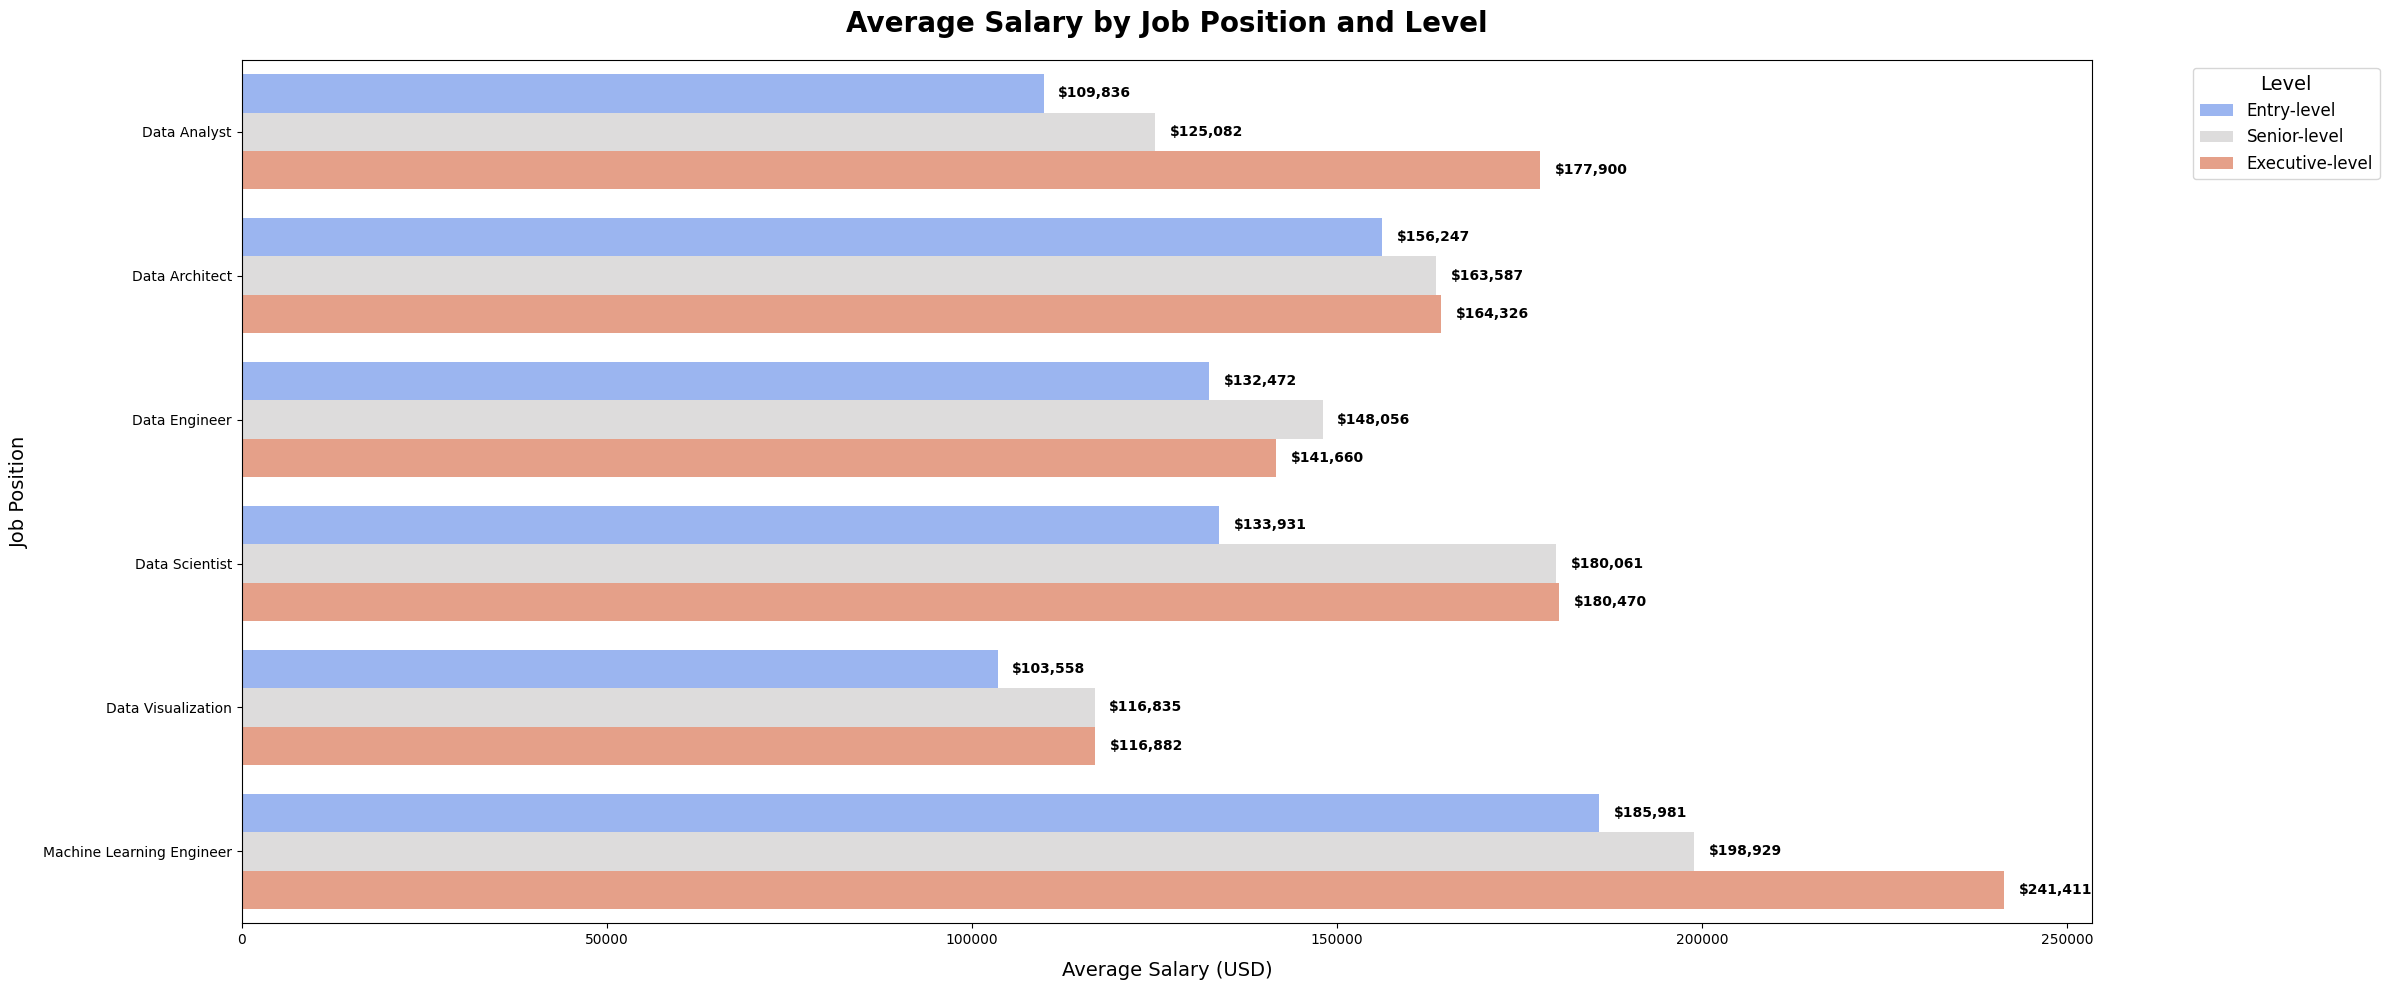

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the DataFrame
# Filter out rows where job_position or level contains 'other' or 'unspecified'
filtered_data = data[
    ~data['job_position'].str.lower().isin(['other', 'unspecified']) &
    ~data['level'].str.lower().isin(['other', 'unspecified'])
]

# Calculate the average salary
filtered_data['Average_Salary'] = (filtered_data['Min_Salary'] + filtered_data['Max_Salary']) / 2

# Convert 'level' column to a categorical type with a specific order
level_order = ['Entry-level', 'Senior-level', 'Executive-level']
filtered_data['level'] = pd.Categorical(
    filtered_data['level'],
    categories=level_order,
    ordered=True
)

# Group by job_position and level to calculate average salary
average_salary_by_position_and_level = (
    filtered_data.groupby(['job_position', 'level'])['Average_Salary']
    .mean()
    .reset_index()
)

# Filter out rows with Average_Salary equal to 0
average_salary_by_position_and_level = average_salary_by_position_and_level[
    average_salary_by_position_and_level['Average_Salary'] > 0
]

# Create a grouped bar chart for job position and level by average salary
plt.figure(figsize=(24, 10))
bars = sns.barplot(
    data=average_salary_by_position_and_level,
    x='Average_Salary',
    y='job_position',
    hue='level',
    palette='coolwarm',
    hue_order=level_order  # Ensure the hue follows the desired order
)

# Add a title and labels
plt.title(
    'Average Salary by Job Position and Level',
    fontsize=20,
    weight='bold',
    pad=20
)
plt.xlabel('Average Salary (USD)', fontsize=14, labelpad=10)
plt.ylabel('Job Position', fontsize=14, labelpad=10)

# Adding annotations to each bar for clarity
for bar in bars.patches:
    width = bar.get_width()
    if width > 0:  # Only annotate bars with non-zero values
        plt.text(
            width + 2000,  # Positioning text slightly outside the bar
            bar.get_y() + bar.get_height() / 2,
            f'${width:,.0f}',  # Display salary value
            va='center', fontsize=10, color='black', weight='bold'
        )

# Adjusting legend placement and font size
plt.legend(
    title='Level',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12,
    title_fontsize=14
)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Machine Learning Engineers enjoy the highest overall salary progression, indicating strong demand and value for expertise in this role.
Data Scientists and Data Architects show consistent salaries at senior and executive levels, suggesting competitive compensation in advanced positions.
Data Visualization has relatively flat salary progression, indicating limited growth in higher-level roles within this specialization.

## Top 5 Hiring Companies Job Listings by Positions

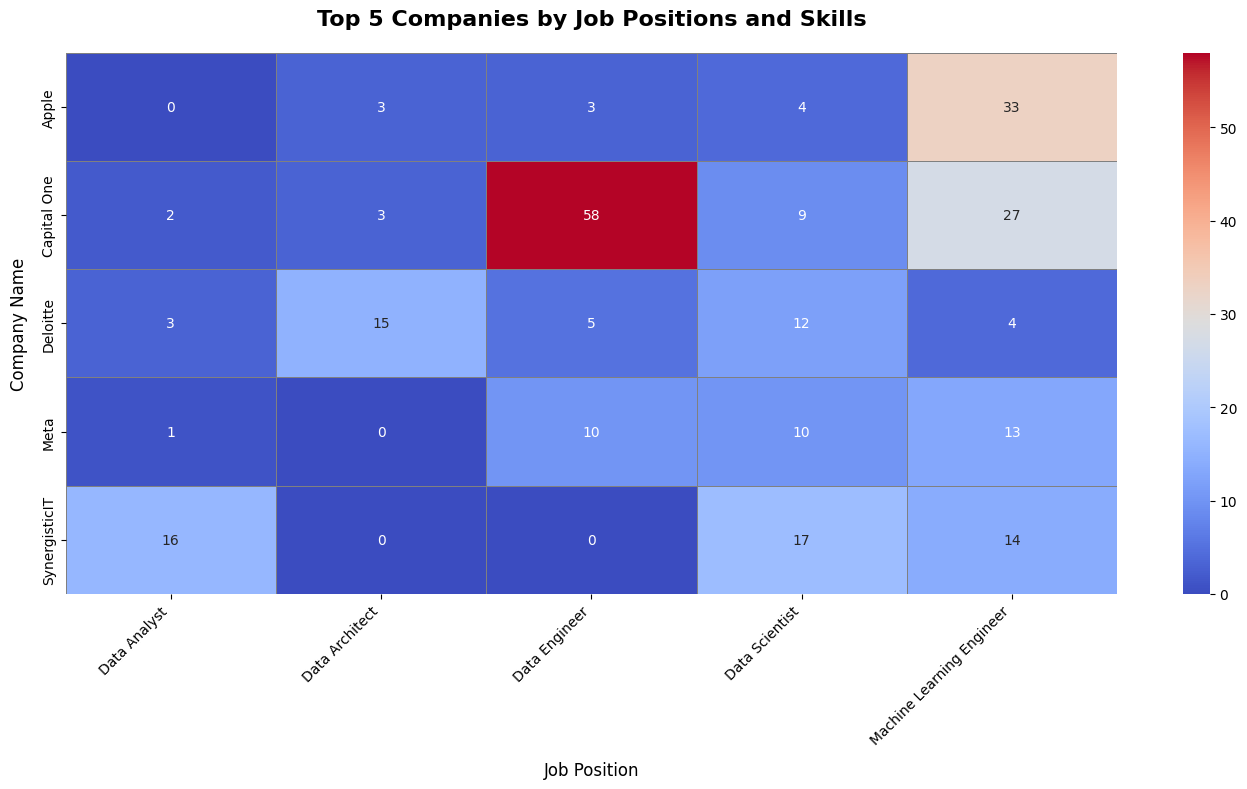

In [6]:
# Filter out rows where job_position is "other"
filtered_data = data[data['job_position'].str.lower() != 'other']

# Exclude specific companies (e.g., Upwork, FlexJobs, VirtualVocations)
excluded_companies = ['Upwork', 'FlexJobs', 'VirtualVocations']
filtered_data = filtered_data[~filtered_data['Company_Name'].isin(excluded_companies)]

# Group by company, job position, and programming languages, and count job postings
company_position_skills = filtered_data.groupby(['Company_Name', 'job_position', 'Programming_Languages']).size().reset_index(name='Job_Count')

# Sort by job count and filter the top 10 companies
top_companies = company_position_skills.groupby('Company_Name').sum().sort_values(by='Job_Count', ascending=False).head(5).reset_index()

# Filter the original grouped data for only the top 10 companies
top_company_position_skills = company_position_skills[company_position_skills['Company_Name'].isin(top_companies['Company_Name'])]

# Visualization: Heatmap for top companies, positions, and skills
plt.figure(figsize=(14, 8))
heatmap_data = top_company_position_skills.pivot_table(
    index='Company_Name',
    columns='job_position',
    values='Job_Count',
    aggfunc='sum',
    fill_value=0
)

# Creating the heatmap with a different color palette
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap="coolwarm",  # Using a visually appealing color palette
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Top 5 Companies by Job Positions and Skills', fontsize=16, weight='bold', pad=20)
plt.xlabel('Job Position', fontsize=12, labelpad=10)
plt.ylabel('Company Name', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

This chart represents a heatmap illustrating the distribution of job positions and skills among the top 5 companies. The color intensity in the heatmap corresponds to the frequency of postings for a particular combination of job position and company.


Capital One has a dominant focus on the Data Engineer role, indicating a strong need for engineering-related expertise in data.
Apple stands out for its high demand for Machine Learning Engineers, showcasing the company's focus on AI and advanced technologies.
Deloitte demonstrates a balanced demand across various roles, reflecting its diversified data-driven initiatives.
Meta primarily seeks Data Scientists and Machine Learning Engineers, aligning with its emphasis on leveraging data science and AI in its operations.
SynergisticIT focuses on entry-level and intermediate roles, such as Data Analysts and Data Scientists, likely catering to clients needing foundational data expertise.

## Education level required for Data Science Job Positions

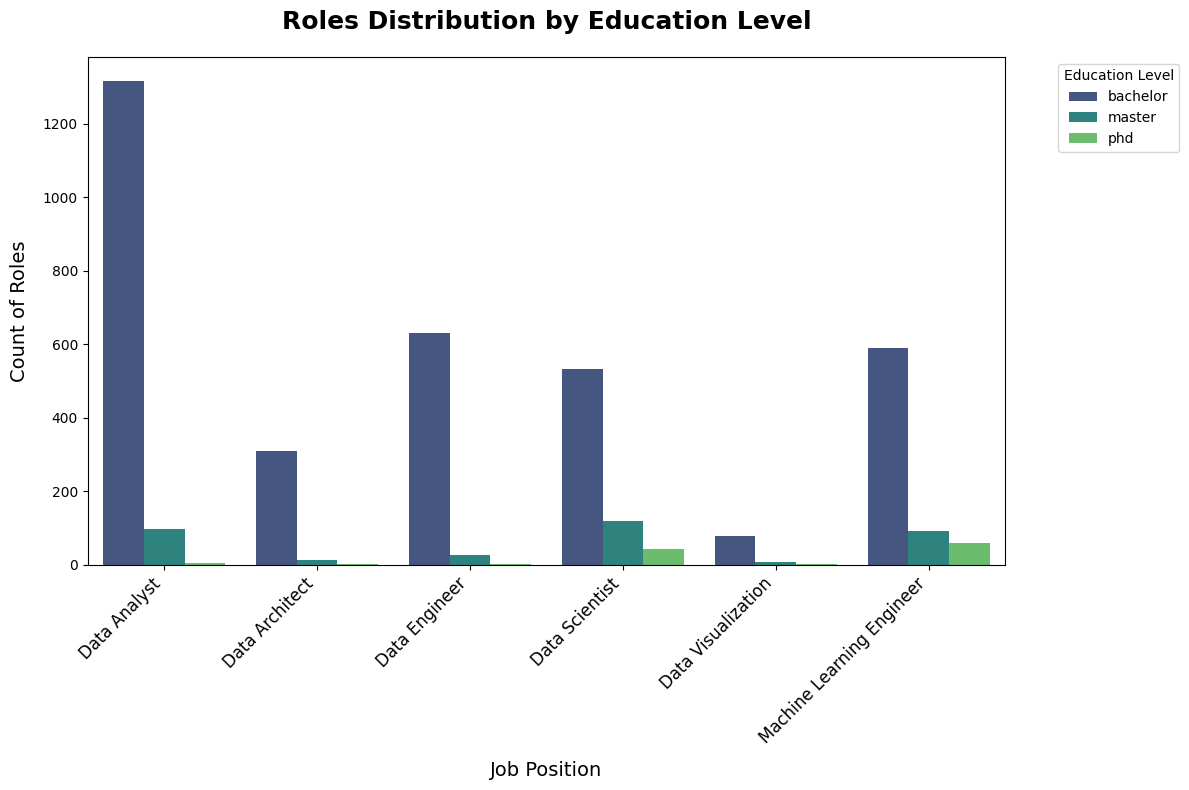

In [ ]:
# Dropping "Other" job positions along with "Unknown" education levels
roles_education_data_filtered = data[
    (data['Education'] != 'Unknown') & (data['job_position'] != 'Other')
]

# Grouping data to calculate the count of roles by job position and education level
roles_education_grouped = roles_education_data_filtered.groupby(['job_position', 'Education']).size().reset_index(name='Count')

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=roles_education_grouped,
    x='job_position',
    y='Count',
    hue='Education',
    palette='viridis'
)
plt.title('Roles Distribution by Education Level', fontsize=18, weight='bold', pad=20)
plt.xlabel('Job Position', fontsize=14, labelpad=10)
plt.ylabel('Count of Roles', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This chart represents the distribution of job roles by education level across various data-related positions.

Bachelor's degree holders dominate across all roles, making it the most common educational qualification.
Roles such as Data Scientist and Machine Learning Engineer show a stronger preference for Master's and PhD holders, aligning with the advanced expertise required in these fields.
The Data Analyst role stands out as the most in-demand position, primarily requiring a Bachelor's degree, making it an accessible entry point into data-related careers.
For aspirants targeting specialized roles like Data Scientist or Machine Learning Engineer, pursuing advanced education (Master's or PhD) could provide a competitive edge.

## Rare Skills with High Pay

<ipython-input-44-8c1324fa3127>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(skills_with_low_frequency['Combined_Skills'], rotation=45, ha='right', fontsize=12)


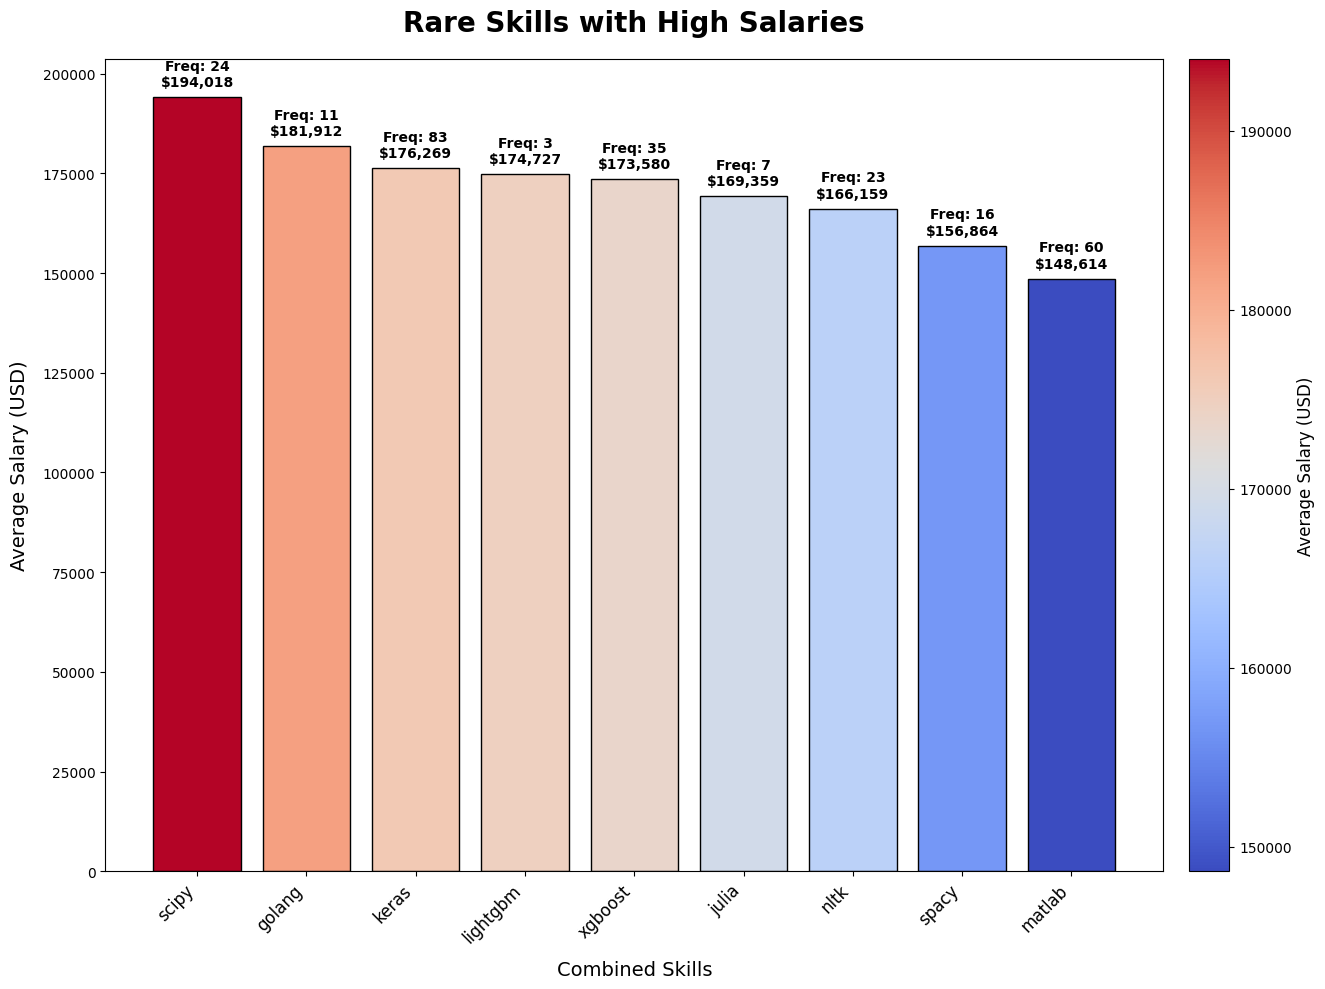

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Assuming you already have the dataset loaded
# Load the dataset (replace '/path/to/your/data.csv' with the actual file path)

# Combine relevant columns into a single column for analysis
data['Combined_Skills'] = data[['Programming_Languages', 'ML_and_Data_Science_Libraries']].apply(
    lambda x: ', '.join(x.dropna()), axis=1)

# Explode the skills to create a list of skills and clean the data
data['Combined_Skills'] = data['Combined_Skills'].str.split(', ')
exploded_data = data.explode('Combined_Skills').reset_index(drop=True)

# Group by skills and calculate frequency and average salary
grouped_skills_stats = exploded_data.groupby('Combined_Skills').agg(
    Frequency=('Combined_Skills', 'size'),
    Avg_Salary=('Average_Salary', 'mean')
).reset_index()

# Filter skills with low frequency and sort by average salary
skills_with_low_frequency = grouped_skills_stats[grouped_skills_stats['Frequency'] < 100].sort_values(
    by='Avg_Salary', ascending=False).head(10)

# Visualization: Adjusting the plot to a vertical bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Normalize data for gradient coloring based on salaries
norm = Normalize(vmin=skills_with_low_frequency['Avg_Salary'].min(), vmax=skills_with_low_frequency['Avg_Salary'].max())
sm = ScalarMappable(cmap='coolwarm', norm=norm)
colors = sm.to_rgba(skills_with_low_frequency['Avg_Salary'])

# Create the vertical bar chart
bars = ax.bar(skills_with_low_frequency['Combined_Skills'], skills_with_low_frequency['Avg_Salary'], color=colors, edgecolor='black')
ax.set_title('Rare Skills with High Salaries', fontsize=20, weight='bold', pad=20)
ax.set_xlabel('Combined Skills', fontsize=14, labelpad=10)
ax.set_ylabel('Average Salary (USD)', fontsize=14, labelpad=10)
ax.set_xticklabels(skills_with_low_frequency['Combined_Skills'], rotation=45, ha='right', fontsize=12)

# Adding color bar for salary gradient
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Average Salary (USD)', fontsize=12)

# Annotating salary and frequency outside the bars
for bar, (freq, salary) in zip(bars, zip(skills_with_low_frequency['Frequency'], skills_with_low_frequency['Avg_Salary'])):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2000,
        f'Freq: {freq}\n${salary:,.0f}',
        va='bottom', ha='center', fontsize=10, color='black', weight='bold'
    )

plt.tight_layout()
plt.show()


This bar chart illustrates the average salaries in USD for jobs requiring certain rare technical skills, ranked from highest to lowest average salary. Each bar corresponds to a specific skill and is labeled with the frequency of job postings mentioning that skill (e.g., "Freq: 24") and the corresponding average salary (e.g., "$194,018").
Employers are willing to pay premium salaries for skills that are less frequently found in the job market, such as "scipy," "golang," and "keras."
Some skills like "matlab" and "spacy" have higher frequencies but relatively lower salaries, indicating they might be more general-purpose or widely taught.

## Top Hiring Companies with Average Salaries

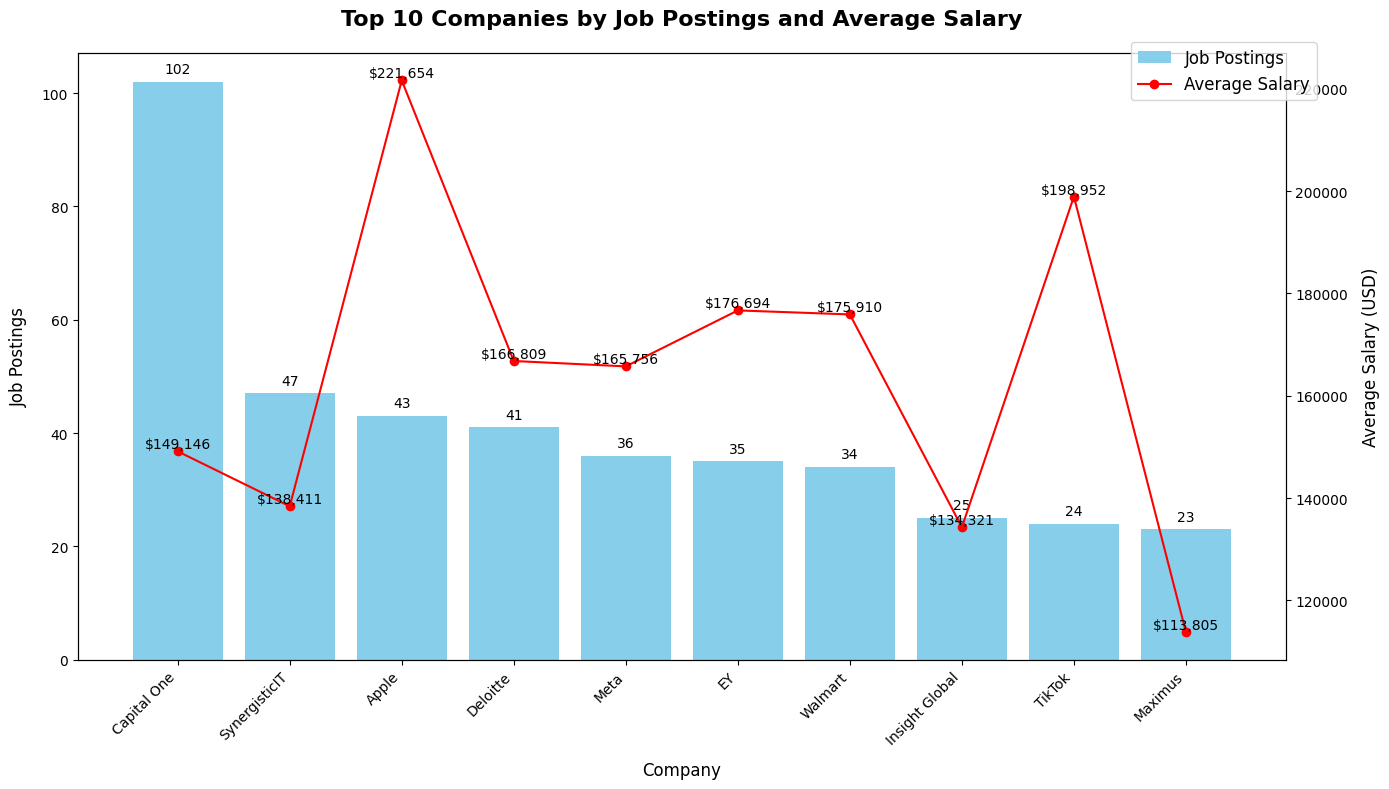

In [7]:
# Filter data and exclude specific platforms
platforms_to_exclude = ['Upwork', 'FlexJobs', 'VirtualVocations']
filtered_data = data[~data['Company_Name'].isin(platforms_to_exclude)]

# Group data by Company_Name and calculate job postings and average salary
company_job_data = filtered_data.groupby('Company_Name').agg(
    Job_Postings=('Title', 'count'),
    Avg_Salary=('Average_Salary', 'mean')
).reset_index()

# Sort the companies by the number of job postings in descending order
top_companies = company_job_data.sort_values(by='Job_Postings', ascending=False).head(10)

# Visualization: Top companies with job postings and their salaries
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for job postings
bars = ax1.bar(
    top_companies['Company_Name'],
    top_companies['Job_Postings'],
    color='skyblue',
    label='Job Postings'
)

# Add labels and title
ax1.set_title('Top 10 Companies by Job Postings and Average Salary', fontsize=16, weight='bold', pad=20)
ax1.set_xlabel('Company', fontsize=12, labelpad=10)
ax1.set_ylabel('Job Postings', fontsize=12, labelpad=10)
ax1.set_xticks(range(len(top_companies)))
ax1.set_xticklabels(top_companies['Company_Name'], rotation=45, ha='right', fontsize=10)

# Second axis for average salary
ax2 = ax1.twinx()
ax2.plot(
    top_companies['Company_Name'],
    top_companies['Avg_Salary'],
    color='red',
    marker='o',
    label='Average Salary'
)
ax2.set_ylabel('Average Salary (USD)', fontsize=12, labelpad=10)

# Adding annotations to bars
for bar, salary in zip(bars, top_companies['Avg_Salary']):
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f"{bar.get_height()}",
        ha='center',
        va='bottom',
        fontsize=10
    )
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        salary,
        f"${salary:,.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add legends for both axes
fig.legend(loc='upper right', fontsize=12, bbox_to_anchor=(0.95, 0.95))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


This chart displays the Top 10 Companies by Job Postings and Average Salary. It combines two metrics to provide an overview of hiring trends and salary levels for the top companies.

Capital One leads with 102 job postings, offering an average salary of 149,146.

Apple provides highest salary with 43 positions.

TikTok offers the highest average salary at 198,952, despite having only 24 job postings.

Maximus has the lowest average salary of 113,805, even though it has 23 job postings.
Insight Global offers a slightly higher salary of 134,321, with 25 postings.

There is no strong correlation between the number of job postings and average salary.
For example, SynergisticIT has the second-highest number of job postings but offers a lower average salary of $138,411 compared to companies with fewer postings.


Companies with fewer job postings, like TikTok and Meta, tend to offer higher salaries, suggesting they may target specialized or higher-level roles.
Companies with a high volume of job postings, like Capital One, may offer competitive but not necessarily top-tier salaries, possibly reflecting broader hiring needs across various roles.

##  Top States by Job Count and Average Salary

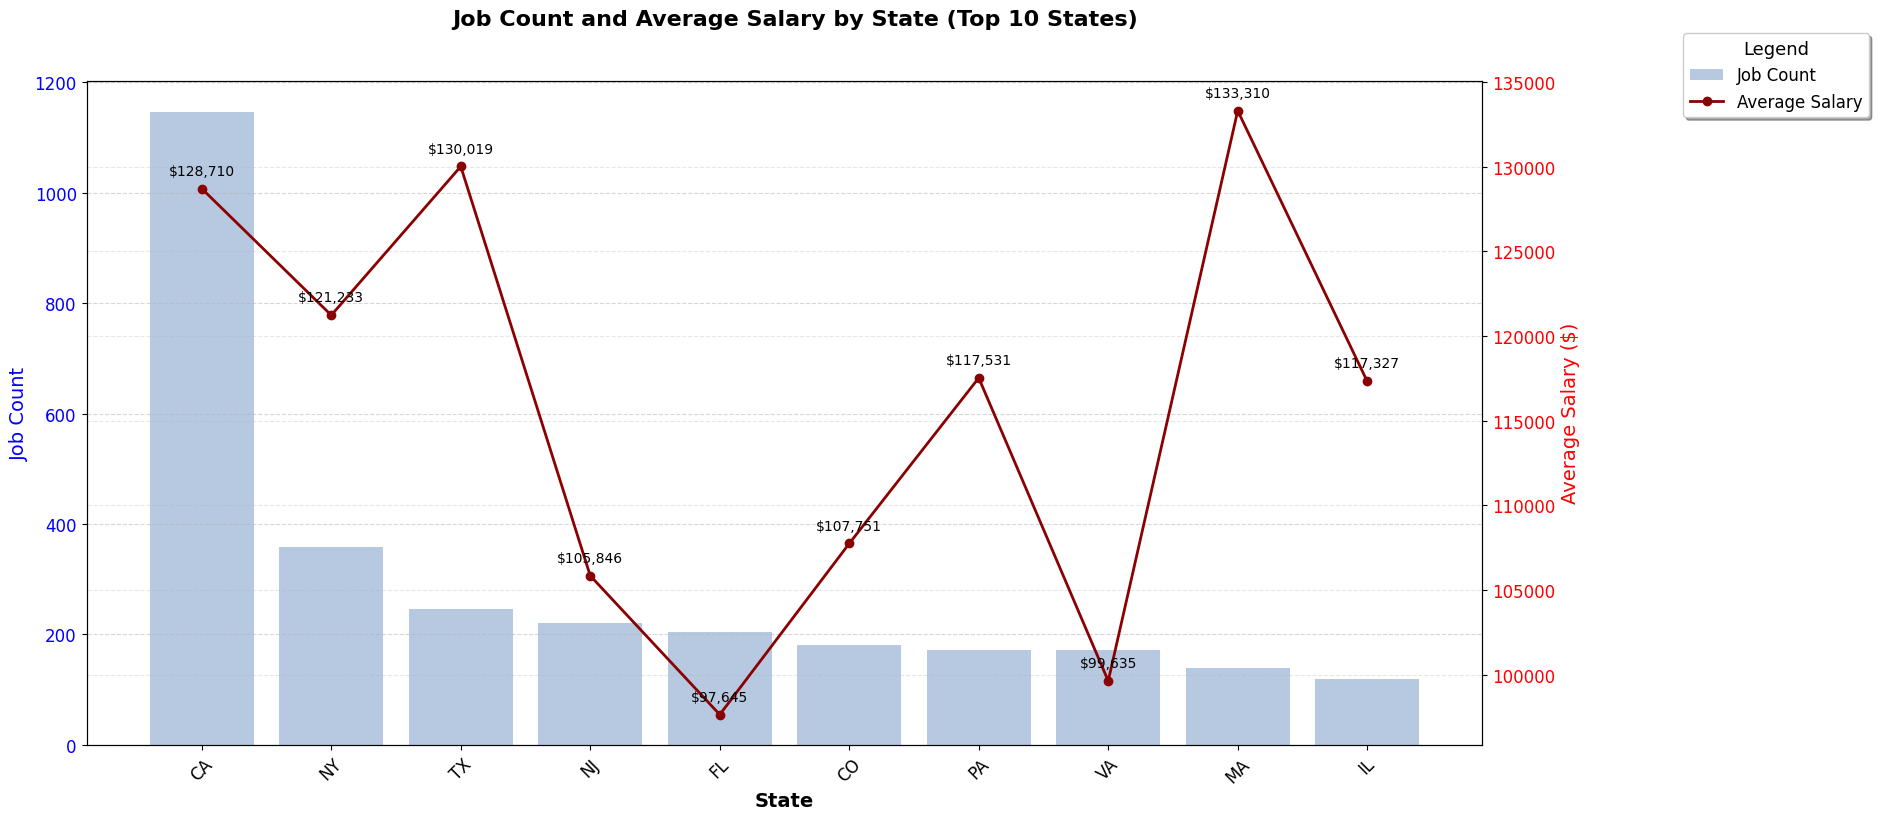

In [11]:
# Plotting
fig, ax1 = plt.subplots(figsize=(16, 8))  # Increased width for better spacing

# Bar Chart: Job Count
bars = ax1.bar(
    top_states.index,
    top_states['Job_Count'],
    color='lightsteelblue',
    alpha=0.9,
    label='Job Count'
)
ax1.set_xlabel('State', fontsize=14, weight='bold')
ax1.set_ylabel('Job Count', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=12)
ax1.tick_params(axis='x', labelsize=12, rotation=45)  # Adjust rotation for clarity
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Line Chart: Average Salary
ax2 = ax1.twinx()
line = ax2.plot(
    top_states.index,
    top_states['Average_Salary'],
    color='darkred',
    marker='o',
    label='Average Salary',
    linewidth=2
)
ax2.set_ylabel('Average Salary ($)', color='red', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.3)

# Annotating each data point on the line chart
for i, value in enumerate(top_states['Average_Salary']):
    ax2.annotate(
        f"${value:,.0f}",
        xy=(i, value),
        xytext=(0, 10),
        textcoords="offset points",
        ha='center',
        fontsize=10,
        color='black'
    )

# Adding a Title
fig.suptitle(
    'Job Count and Average Salary by State (Top 10 States)',
    fontsize=16,
    weight='bold',
    y=1.02
)

# Adding Legends Outside the Plot
fig.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1),  # Move legend outside the chart area
    fontsize=12,
    frameon=True,
    shadow=True,
    title='Legend',
    title_fontsize=13
)

# Adjust Layout to Prevent Overlap
plt.tight_layout()

plt.show()


This chart illustrates the Top States by Job Count and Average Salary, providing insights into the hiring trends and salary levels across different states.

California leads with over 1,200 job postings, with an average salary of 159,253.

Massachusetts has a high average salary of 146,328 despite having fewer job postings compared to California.
New York offers a competitive salary of 146,646 with fewer postings than California.

Florida has the lowest average salary among the top states at $128,729, reflecting a less competitive salary market.



## Relationship Between Education Level, Experience, and Average Salary

<ipython-input-64-270c042251a6>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_salary = data.groupby(['Education', 'Experience_Group'])['Average_Salary'].mean().reset_index()


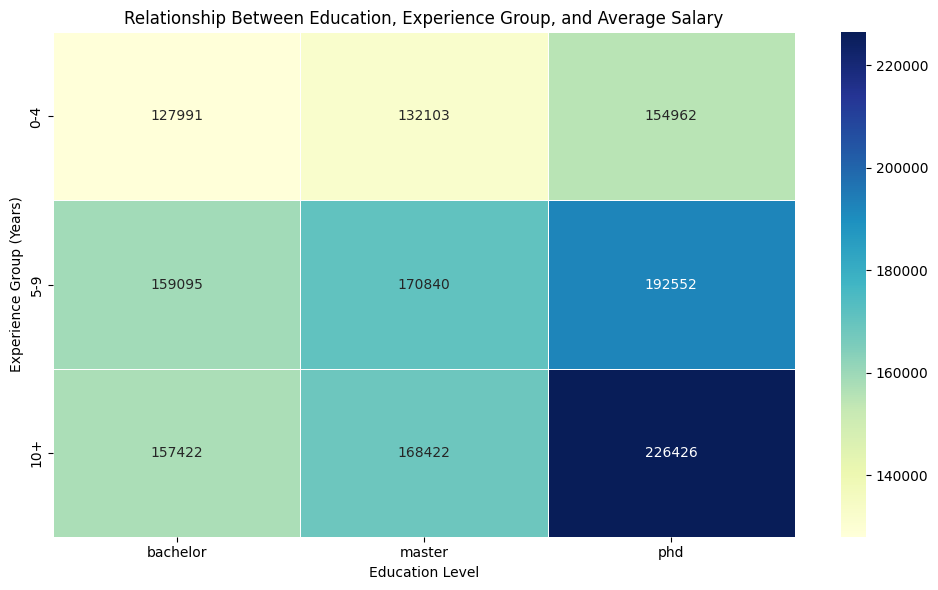

In [ ]:
# Binning the experience into groups: 0-4, 5-9, and 10+
bins = [0, 4, 9, float('inf')]
labels = ['0-4', '5-9', '10+']
data['Experience_Group'] = pd.cut(data['Experience'], bins=bins, labels=labels, right=False)

# Grouping data by Education and Experience_Group and calculating the mean of Average Salary
grouped_salary = data.groupby(['Education', 'Experience_Group'])['Average_Salary'].mean().reset_index()

# Pivoting data for visualization
pivot_grouped_salary = grouped_salary.pivot(index='Experience_Group', columns='Education', values='Average_Salary')

# Creating a heatmap to visualize the relationship
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_grouped_salary, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Relationship Between Education, Experience Group, and Average Salary')
plt.xlabel('Education Level')
plt.ylabel('Experience Group (Years)')
plt.tight_layout()
plt.show()


This heatmap shows the Relationship Between Education Level, Experience Group (in years), and Average Salary.

Education Investment:

Pursuing a PhD yields the highest salary benefits, particularly for mid to late-career professionals (5+ years of experience).
Early Career:

For individuals with 0-4 years of experience, a master's degree offers only a slight advantage over a bachelor's degree in terms of salary.
Value of Experience:

The increase in salary with experience is notable across all education levels, emphasizing the importance of skill and expertise gained over time.